In [2]:

import pandas as pd
import numpy as np
from collections import Counter

listingsdata = pd.read_csv("C://Users//i_ins//Documents//255//Project//listing.csv")
listingsdata=listingsdata[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]

# replacing NaN values with 0
listingsdata.fillna(0, inplace=True)

#Extracting prices from the table
listingsprice = listingsdata['price']
listingsprices=[]

#clean the data to make it float
for x in listingsprice:
    x=float(x[1:].replace(',',''))
    listingsprices.append(x)

#replace the price column with the new column
listingsdata['price']=listingsprices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
listingsdata = listingsdata[listingsdata.bathrooms >0]
listingsdata = listingsdata[listingsdata.bedrooms > 0]
listingsdata = listingsdata[listingsdata.beds > 0]
listingsdata = listingsdata[listingsdata.price  > 0]
listingsdata = listingsdata[listingsdata.review_scores_rating  > 0]
listingsdata = listingsdata[listingsdata.reviews_per_month > 0]
listingsdata = listingsdata[listingsdata.accommodates  > 0]
listingsdata.head()


,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,958,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,-122.43386,37.76931,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,t,*Quiet cul de sac in friendly neighborhood *St...,Western Addition,...,Entire home/apt,3,1.0,1.0,2.0,1.84,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",moderate,240,170.0
1,5858,Creative Sanctuary,0,-122.42102,37.74511,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,f,I love how our neighborhood feels quiet but is...,Bernal Heights,...,Entire home/apt,5,1.0,2.0,3.0,0.83,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",strict_14_with_grace_period,111,235.0
2,7918,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,-122.45213,37.76555,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,f,"Shopping old town, restaurants, McDonald, Whol...",Haight Ashbury,...,Private room,2,4.0,1.0,1.0,0.15,"{TV,Internet,Wifi,Kitchen,""Free street parking...",strict_14_with_grace_period,19,65.0
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,-122.45213,37.76555,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,f,0,Haight Ashbury,...,Private room,2,4.0,1.0,1.0,0.12,"{TV,Internet,Wifi,Kitchen,""Free street parking...",strict_14_with_grace_period,8,65.0
4,8339,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,-122.43637,37.77525,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,f,0,Western Addition,...,Entire home/apt,4,1.5,2.0,2.0,0.22,"{TV,Internet,Wifi,Kitchen,""Free street parking...",moderate,28,703.0


In [3]:
# Categorizing differernt listings based on room_type

typeOfRoomData=listingsdata.groupby('room_type').id.count()
typeOfRoomData=typeOfRoomData.reset_index()
typeOfRoomData=typeOfRoomData.rename(columns={'id':'number_Of_Listings'})
typeOfRoomData

,room_type,number_Of_Listings
0,Entire home/apt,3104
1,Hotel room,66
2,Private room,2083
3,Shared room,155


#### Now will visuliaze the room type listing in graph format to get more clear vision of data. 

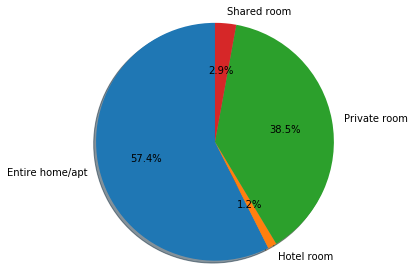

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Pie chart
labels = typeOfRoomData.room_type
sizes = typeOfRoomData.number_Of_Listings


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Listings Count')

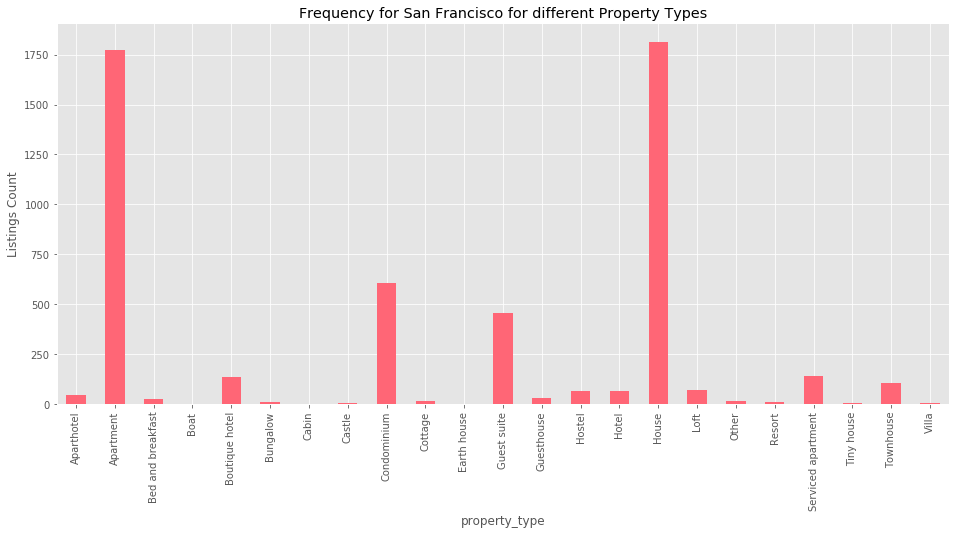

In [5]:
# Analyzing and plotting the number of listings based on their property type

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

listingsPorpertyType = listingsdata.groupby('property_type').id.count()
listingsPorpertyType= listingsPorpertyType.reset_index()
listingsPorpertyType=listingsPorpertyType.rename(columns={'id':'Number_Of_Listings'})
objects = listingsPorpertyType['property_type']
y_pos = listingsPorpertyType['Number_Of_Listings']

listingsPorpertyType.plot(kind='bar', x='property_type', y='Number_Of_Listings', color = '#ff6676', figsize =(16,7), 
            title = 'Frequency for San Francisco for different Property Types', legend = False)
plt.ylabel('Type of Property')
plt.ylabel('Listings Count')

##### From above Graph we can analyze that Most of the owners are providing listings as their full property.  We can see the maximum count for listing for types  "Apartment" and "House". Hence property type plays an important role in the listings of Airbnb in San Francisco. We also see the property type of "Condominium" and "Guest Suite" have been provided as listing in good numbers compared to other unfamiliar residencies here and there. 

In [6]:
# analyzing the prices for different room type and property type

PropertyRoomData = listingsdata.groupby(['property_type','room_type']).price.mean()
PropertyRoomData = PropertyRoomData.reset_index()
PropertyRoomData = PropertyRoomData.sort_values('price',ascending=[0])
PropertyRoomData.head()

,property_type,room_type,price
54,Villa,Entire home/apt,2082.000000
35,Hotel,Private room,1862.033333
18,Castle,Entire home/apt,1600.000000
45,Resort,Hotel room,750.000000
44,Resort,Entire home/apt,699.000000


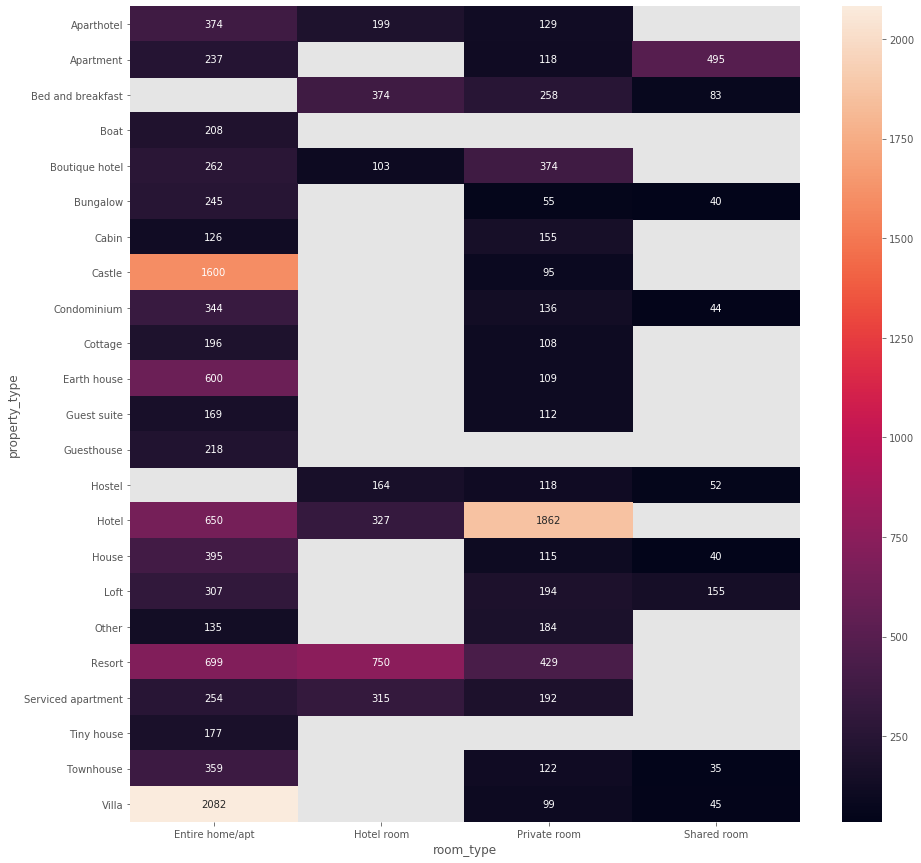

In [7]:
#Plotting the same on a heatMap

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(listingsdata.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

##### Above graph shows the listings with respect to room type and property type based on the prices . From this we are more clear for the listings in San Francisco and how the prices of listings is different with respect to property type and room type. Hence we can see prices for Entire home/apt is maximum amongst all the room type. Therefore, we can conclude that property type and room type plays an important role in deciding the prices of listings.   


### Now we will visualize how the number of bedrooms can affect the price of listings.

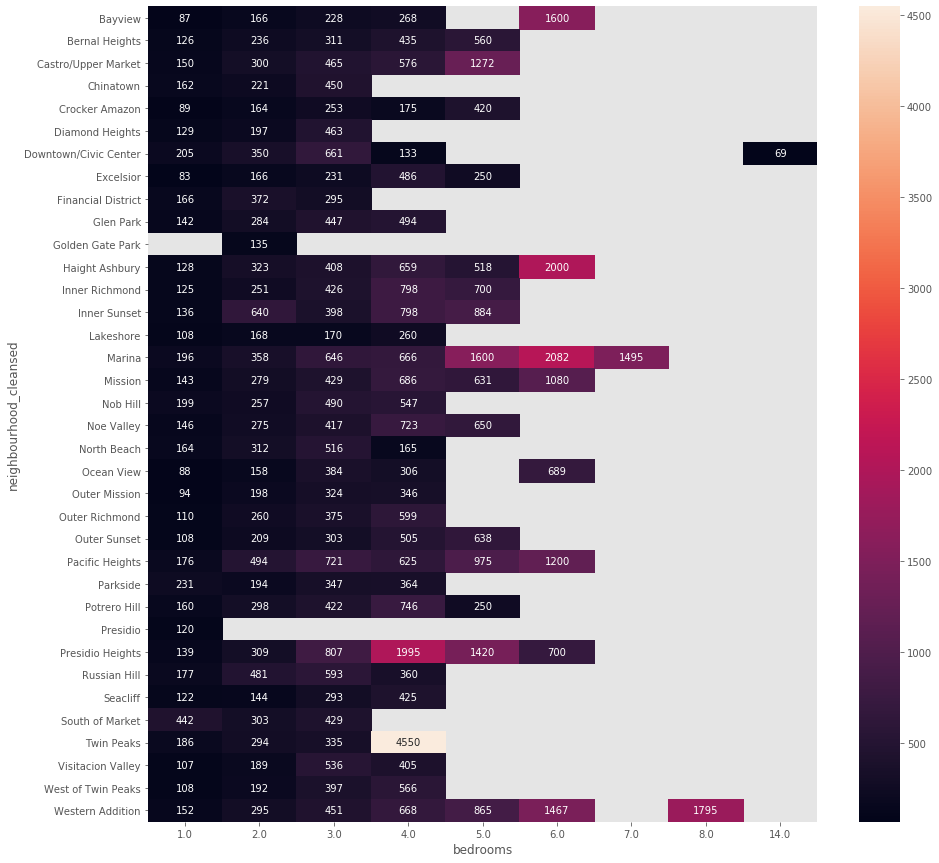

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(listingsdata.groupby(['neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

#### 1. From above graph we can analyze that with the increase in number of bedroom, the prices of listings also increases. But neighbourhood also plays an important role in the prices of listings. 
#### 2. From above analysis, we can say that the property type, room type , number of bedrooms and neighbourhood areas play an important role in deciding the prices of listings.

### Let's analyze the summary field of the listings with its price.


In [9]:
sumlistings = listingsdata[['summary','price']]
sumlistings = sumlistings[pd.notnull(sumlistings['summary'])]
sumlistings = sumlistings[sumlistings['summary']!=0]
sumlistings = sumlistings.sort_values('price',ascending=[0])
data1 = sumlistings.head(50)
data1.head()


,summary,price
6378,"If you’ve seen the classic Hitchcock film, Ver...",10000.0
6412,The Americania Hotel feels like a blast from t...,10000.0
6381,Voted as one of the favorite San Francisco hot...,10000.0
6380,Voted as one of the favorite San Francisco hot...,10000.0
6379,"If you’ve seen the classic Hitchcock film, Ver...",10000.0


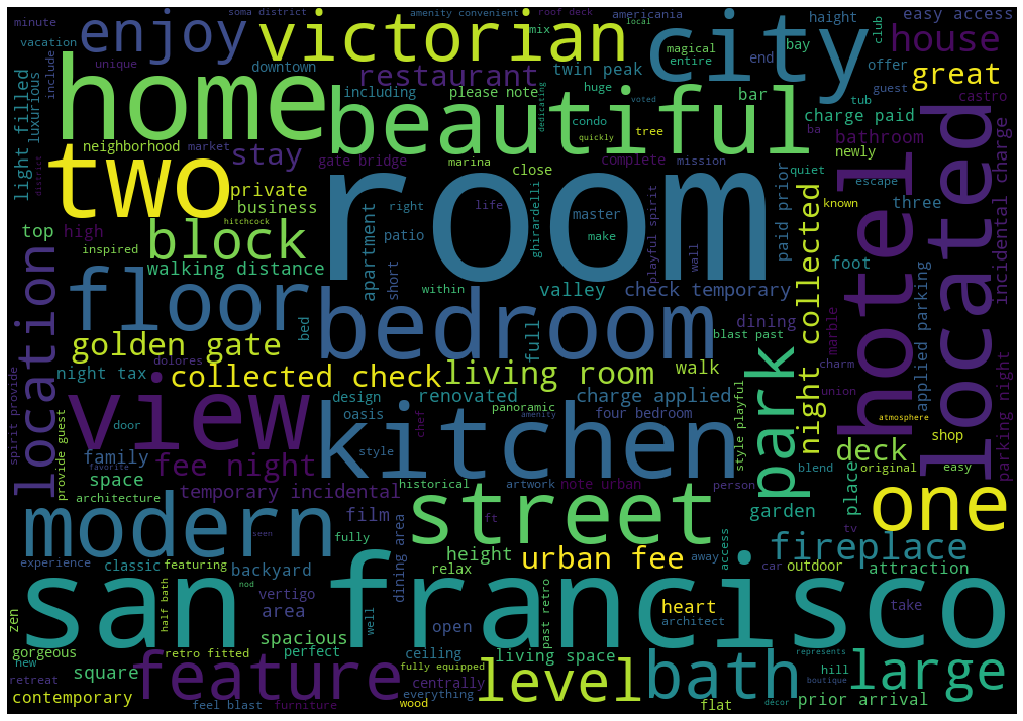

In [12]:
from nltk.corpus import stopwords
import string
import nltk
sumwords=''
for index,row in data1.iterrows():
    sumwords += row['summary']
removepunctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
numbers=['0','1','2','3','4','5','6','7','8','9']
listingsSummary=nltk.word_tokenize(sumwords)
uniquewords = [l.lower() for l in listingsSummary if l not in removepunctuation if l not in ignoreChar if l not in numbers]
dataphase2=[word for word in uniquewords if word not in stopwords.words('english')] 
data2 = nltk.WordNetLemmatizer() 
listingsFinalData=[data2.lemmatize(data) for data in dataphase2]
listingsFinalKeywords=' '.join(listingsFinalData)
listingsFinalKeywords[:50]

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(listingsFinalKeywords)
plt.figure(figsize=(19,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### From above word cloud we can see that the commonly used words in summary of the listings like beautiful, golden gate, fireplace, San francisco, bedroom, modern, street, park , kitchen, bedroom are mentioned in the description of listings by the owner. As the purpose of Airbnb is well understood concept hence owners include the above the words to attract the customers based on the location and features of the place of stay. Hence if owner wants to attract the tourists they can use above words in their description to increase the frequence of listings of their place.  

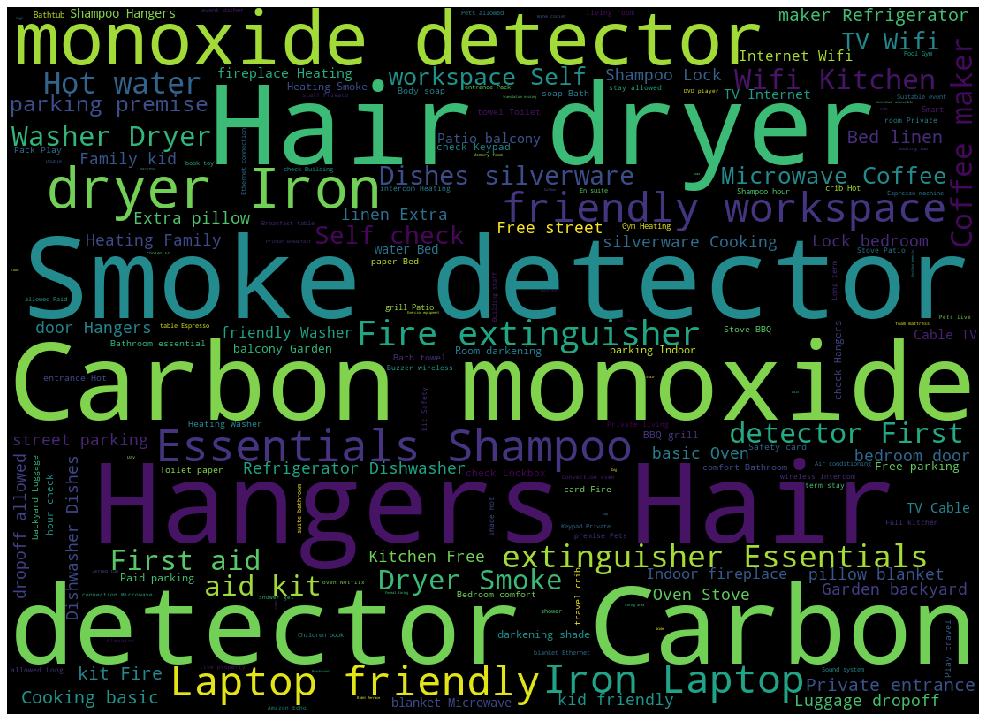

In [14]:
#Analyzing what amenities costs more ?
import re

listingsAmenitiesData = listingsdata[['amenities','price','id',]]
Amenities1 = listingsAmenitiesData.sort_values('price',ascending=[0])
Amenities2=Amenities1.head(40)
amenitiesList = ''
for index,row in Amenities2.iterrows():
    m = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    amenitiesList+=m
amenitiesList_data=nltk.word_tokenize(amenitiesList)
data2=[word for word in amenitiesList_data if word not in stopwords.words('english')] 
data3 = nltk.WordNetLemmatizer() 
amenitiesList_data=[data3.lemmatize(data) for data in data2]
listingsamenitieswords=' '.join(amenitiesList_data)

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1100, height = 800).generate(listingsamenitieswords)
plt.figure(figsize=(19,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### From above word cloud we can analyze amentites like Hair dryer, Hangers , detector, Laptop friendly, first aid, microwave coffee, carbon monooxide detector etc increases the prices of the listings. 


In Conclusion , the prices of listings depends on following factors:

First Category Room Type- Room type of Entire home/apt has higher prices of listing compared to others 

Second Category Property Type - Property type Apartment and house has the maximum count of listing and prices booked by the travellers.

Third Category Number of Bedrooms - The more the number of bedrooms in the listing the more is the price of the listing which also depends on the neighborhood of the listings.

Fourth Category Summary of listings - The words such as beautiful, golden gate, fireplace, San francisco, bedroom, modern, street, park , kitchen, bedroom etc attracts more travellers for that listings.

Fifth category Amenitites of the listings - Amenities such as Hair dryer, Hangers , detector, Laptop friendly, first aid, microwave coffee, carbon monooxide detector etc increases the price of the listings.